In [1]:
import sys

sys.path.append("../")


In [2]:
import os.path

import matplotlib.pyplot as plt
from tqdm import tqdm

from datamodules.coarse_datamodule import CoarseDataModule

import torch
from torch.utils.data import DataLoader


In [3]:
def calculate_intensities(dl: DataLoader):
    max_intensity = []
    min_intensity = []
    mean_intensity = []
    std_intensity = []
    median_intensity = []
    mode_intensity = []

    for batch in tqdm(dl):
        image: torch.Tensor = batch["image"].flatten()

        max_intensity.append(image.max())
        min_intensity.append(image.min())
        mean_intensity.append(image.mean())
        std_intensity.append(image.std())
        median_intensity.append(image.median())
        mode_intensity.append(image.mode().values)

    return (
        max_intensity,
        min_intensity,
        mean_intensity,
        std_intensity,
        median_intensity,
        mode_intensity,
    )


In [4]:
def plot_intensities(
    max_intensity,
    min_intensity,
    mean_intensity,
    std_intensity,
    median_intensity,
    mode_intensity,
):
    _, axes = plt.subplots(3, 2, figsize=(15, 10))

    axes[0, 0].hist(max_intensity, bins="auto")
    axes[0, 0].set_title("Max intensity")

    axes[0, 1].hist(min_intensity, bins="auto")
    axes[0, 1].set_title("Min intensity")

    axes[1, 0].hist(mean_intensity, bins="auto")
    axes[1, 0].set_title("Mean intensity")

    axes[1, 1].hist(std_intensity, bins="auto")
    axes[1, 1].set_title("Std intensity")

    axes[2, 0].hist(median_intensity, bins="auto")
    axes[2, 0].set_title("Median intensity")

    axes[2, 1].hist(mode_intensity, bins="auto")
    axes[2, 1].set_title("Mode intensity")


In [5]:
BASE_DIR = "/mnt/HDD2/flare2022/datasets/FLARE2022"


def get_dl(predict_dir: str):
    dm = CoarseDataModule(
        supervised_dir=os.path.join(BASE_DIR, "Training/FLARE22_LabeledCase50/"),
        predict_dir=os.path.join(BASE_DIR, predict_dir),
        val_ratio=0.001,
        num_labels_with_bg=14,
        ds_cache_type=None,
        batch_size=1,
        max_workers=4,
        pin_memory=False,
    )
    dm.setup("predict")
    return dm.predict_dataloader()


In [6]:
def plot_dl(predict_dir: str):
    print(predict_dir)
    dl = get_dl(predict_dir)
    intensities = calculate_intensities(dl)
    plot_intensities(*intensities)

Training/FLARE22_LabeledCase50/images


100%|██████████| 50/50 [00:11<00:00,  4.18it/s]


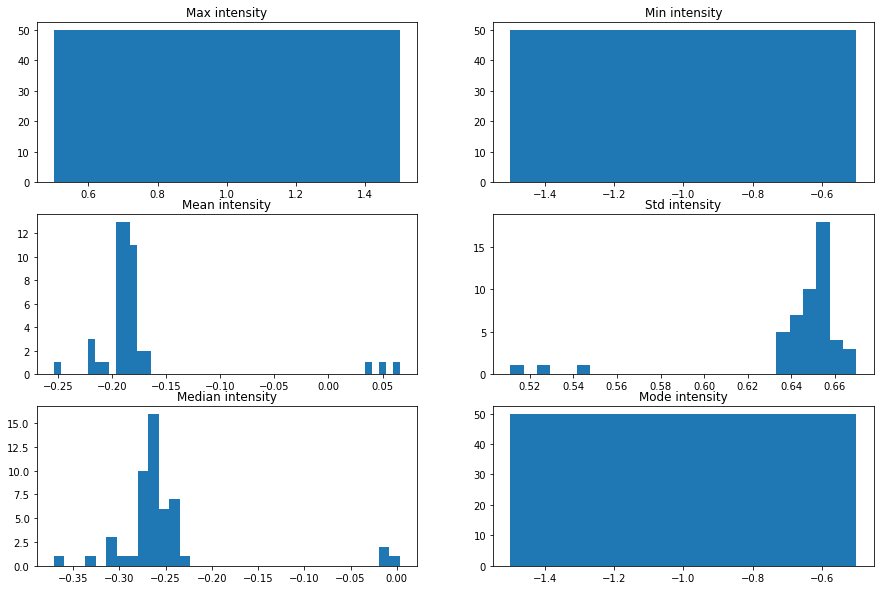

In [7]:
plot_dl("Training/FLARE22_LabeledCase50/images")

Validation


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


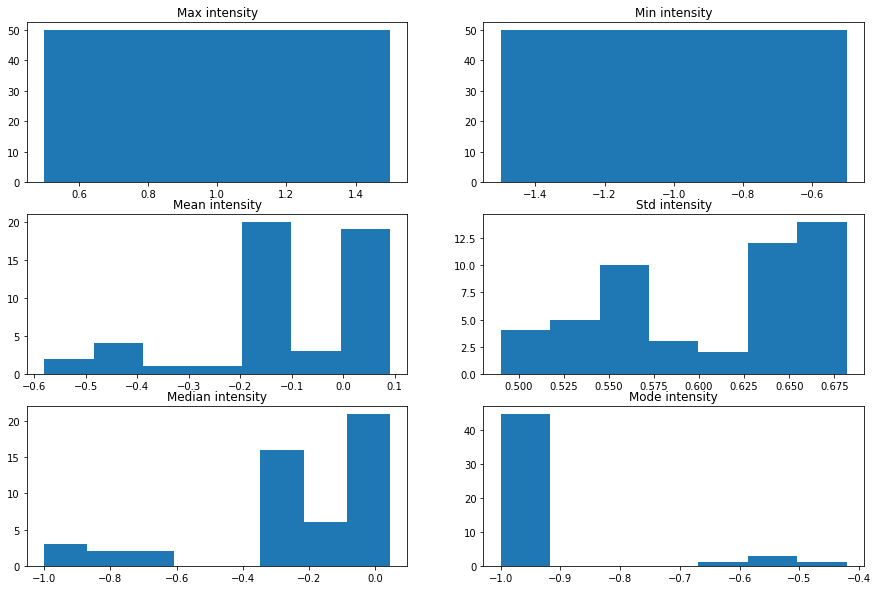

In [8]:
plot_dl("Validation")

Training/Unlabeled


100%|██████████| 2000/2000 [26:11<00:00,  1.27it/s] 


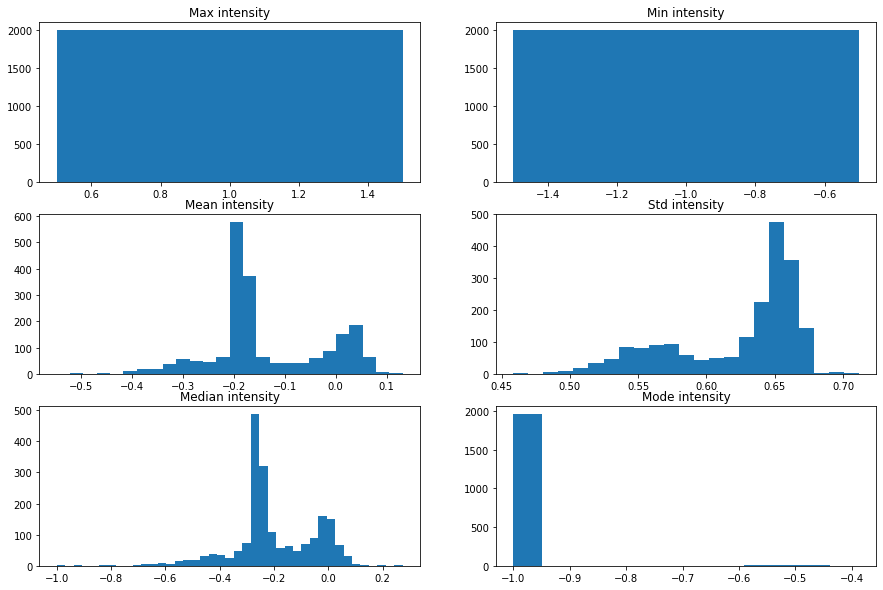

In [9]:
plot_dl("Training/Unlabeled")